In [3]:
import numpy as np # ndarry 다차원 배열 [vector, matrix, tensor]
import scipy # 과학계산용 패키지 (optimization, interpolation)
import sklearn.metrics.pairwise
# accuracy_score, score
# norm은 원점에서의 거리값
a_64 = np.array([61.22, 71.60, -65.755], dtype=np.float64)
b_64 = np.array([61.22, 71.608, -65.72], dtype=np.float64)
a_32 = a_64.astype(np.float32) # 타입변환
b_32 = b_64.astype(np.float32)
dist_64_np = np.array([np.linalg.norm(a_64 - b_64)], # 차이 벡터
                     dtype=np.float64)
dist_32_np = np.array([np.linalg.norm(a_32 - b_32)],
                     dtype=np.float32)

In [4]:
dist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64],[b_32], metric="cityblock")
dist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64],[b_64])

In [5]:
from sklearn.metrics.pairwise import euclidean_distances
print("eulidean distances", euclidean_distances([a_64],[b_64]))

eulidean distances [[0.03590265]]


In [6]:
# 원래 지도학습 -> 비지도학습

5


array([[5.9245283 , 2.7509434 ],
       [6.8804878 , 3.09756098],
       [5.1875    , 3.6375    ],
       [4.76666667, 2.89166667]])

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


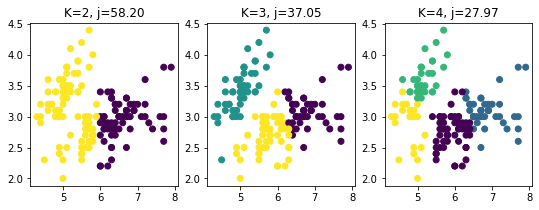

In [7]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = datasets.load_iris() # 4개, 종속 1
X = iris.data[:,:2] # 150 (3개종 1종당 50개의 데이터를 관찰) 150x2
y_iris = iris.target
km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)
plt.figure(figsize=(9,3))
plt.subplot(131) #1행3열에 1번째
plt.scatter(X[:,0], X[:,1], c=km2.labels_)
plt.title("K=2, j=%.2f" % km2.inertia_) # inertia=응집도 : 중심에서의 거리의 합 , 작아야 응집도 최대화
plt.subplot(132)
plt.scatter(X[:,0], X[:,1], c=km3.labels_)
plt.title("K=3, j=%.2f" % km3.inertia_)
plt.subplot(133)
plt.scatter(X[:,0], X[:,1], c=km4.labels_)
plt.title("K=4, j=%.2f" % km4.inertia_)

print(km4.n_iter_)
km4.cluster_centers_ # 그룹의 특성을 이해

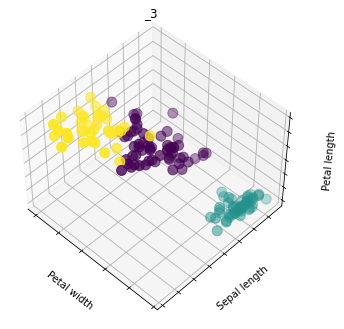

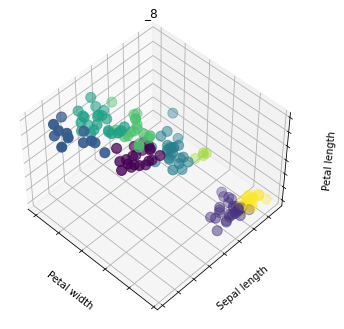

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
np.random.seed(5)
centers = [[1,1],[-1,-1], [1,-1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target
estimators = {'_3': KMeans(n_clusters=3),
             '_8': KMeans(n_clusters=8)}
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum)
    plt.clf() # clear entire current figure 초기화
    # 카메라 상하각, 좌우각
    ax = Axes3D(fig, rect=[0,0, .95, 1], elev=48, azim=134)
    plt.cla() # 축값을 지움
    est.fit(X) # 그룹학습
    labels = est.labels_
    #0:Sepal length,1:Sepal width, 2:Petal length, 3:Petal width
    ax.scatter(X[:,3], X[:,0], X[:,2],
              c=labels.astype(np.float64), s=100)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.title(name)
    fignum = fignum + 1
plt.show()

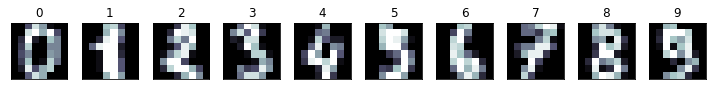

In [9]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
# kmeans와 scale의 관게 : 중요 - 사이즈에 따라 거리값이 불공평
digits = load_digits()
data = scale(digits.data)
def print_digits(images, labels):
    f = plt.figure(figsize=(10,2))
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    i = 0
    while (i < 10 and i < images.shape[0]): # 10장까지만.
        ax = f.add_subplot(1, 10, i + 1) # 이미지 출력은 1부터
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.table
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
print_digits(digits.images, range(10))

# 이미지를 저장
- 데이터로 다루거나, 이미지로 다루거나

In [10]:
digits.data.shape # 1797장

(1797, 64)

In [11]:
digits.images.shape # 이미지로 찍을 때 차원

(1797, 8, 8)

In [12]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

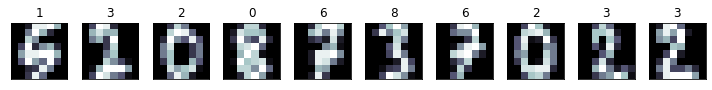

In [14]:
# 클러스터링을 하면 라벨이 결정 => 지도학습한 것과 일치
# 중심10개 생성 -> 새로운 데이터 들어 오면
# 0~9 :  분류
from sklearn.cluster import KMeans
clf = KMeans(init = "k-means++", n_clusters=10, random_state=42)
clf.fit(X_train)
print_digits(images_train, clf.labels_)

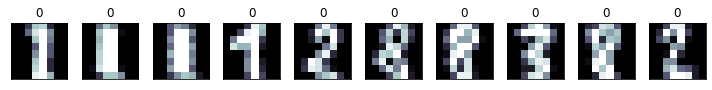

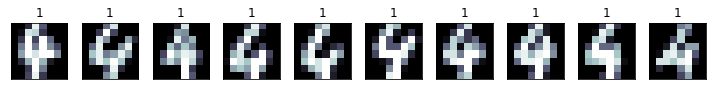

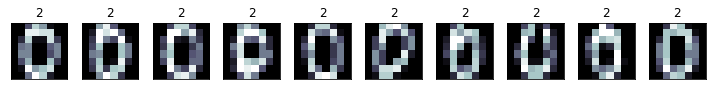

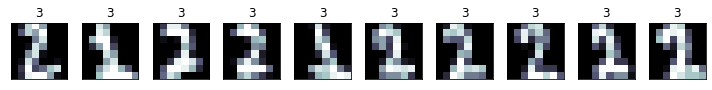

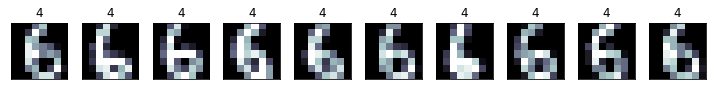

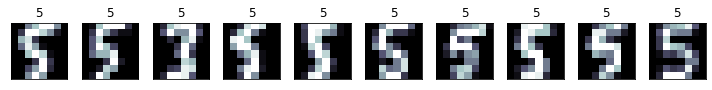

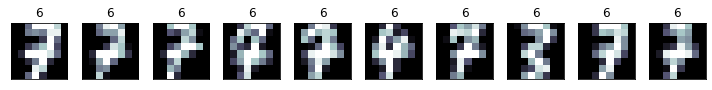

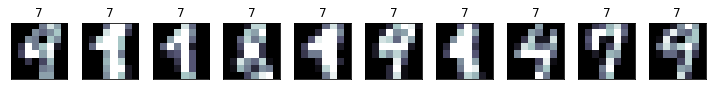

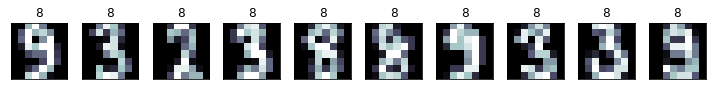

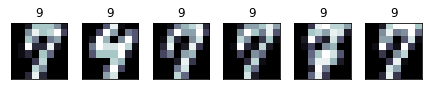

In [15]:
y_pred = clf.predict(X_test)
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    print_digits(images, y_pred) # 클러스터당 10장씩 출력
for i in range(10):
    print_cluster(images_test, y_pred, i)

In [16]:
from sklearn.datasets._samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=5, random_state=101)

C:\Users\020\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\020\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


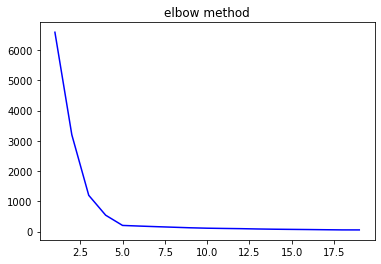

In [17]:
import seaborn as sns
from sklearn.cluster import KMeans
elbow=[]
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
sns.lineplot(range(1,20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('elbow method')
plt.show()

(446400, 3)

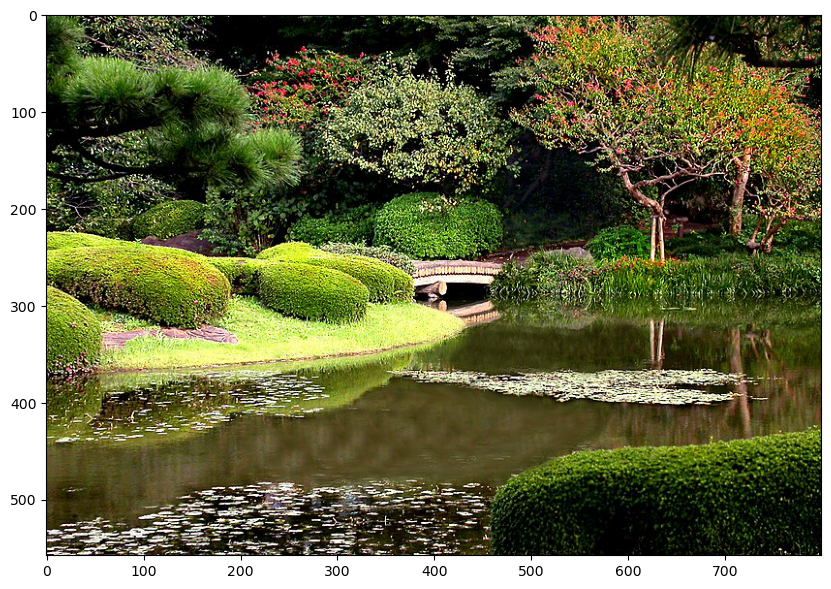

In [18]:
from imageio import imread
import matplotlib.pyplot as plt

img = imread("garden.jpg")
plt.imshow(img)
img.shape

x,y,z = img.shape
long_img = img.reshape(x*y, z)
long_img.shape

In [19]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
n_colors = 64
china = load_sample_image("china.jpg")# 0~255구성
china = np.array(china, dtype=np.float64) / 255 # 이미지 정규화
w, h, d = original_shape = tuple(china.shape)
print(w, h, d) # 427 640 3 # 가로, 세로, 컬값
assert d == 3 # 컬러이미지를 로딩했는지 확인
image_array = np.reshape(china, (w* h, d)) # 2차원으로 직렬화
print("Kmeans 데이터 피팅")
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
# 결과 중심 : 64
# 라벨링 : 1000
print("(k-means) 예측")
labels = kmeans.predict(image_array) # 427 * 640
# 압축, 이밎를 64color로 재표현
def recreate_image(codebook, lables, w, h): # 중심값팔레트, 중심값인덱스, 이미지크기
    d = codebook.shape[1] # 2차원 
    image = np.zeros((w,h,d)) # 이미지 사이즈 만큼 초기화
    label_idx = 0
    for i in range(w):
        for j in range(h): 
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

427 640 3
Kmeans 데이터 피팅
(k-means) 예측


C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51648 missing from current font.
  f

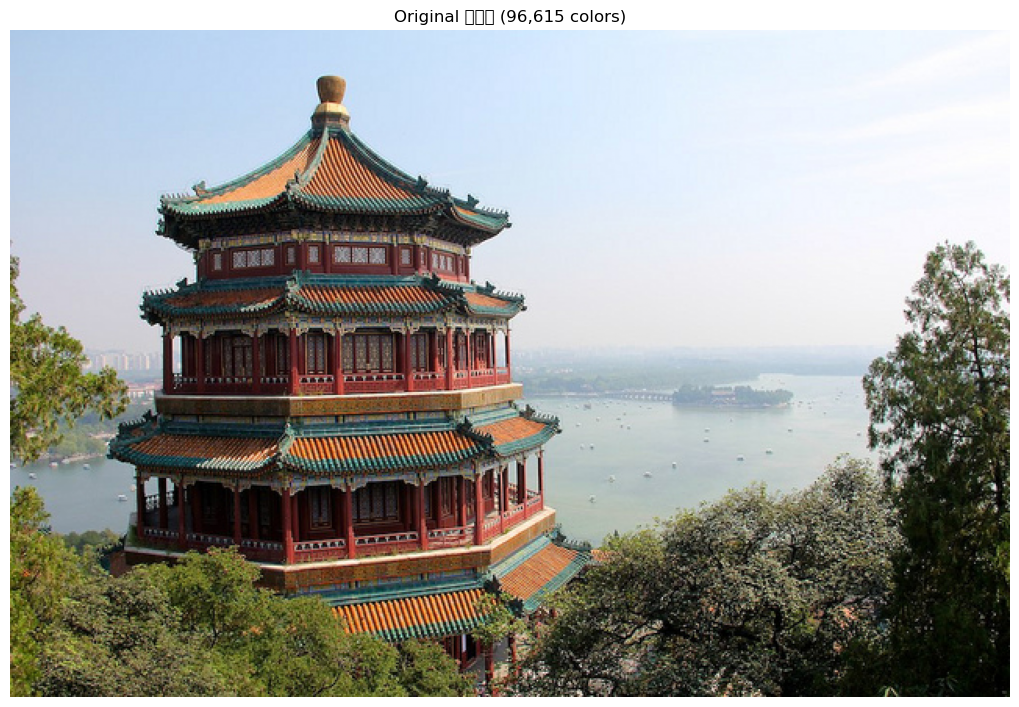

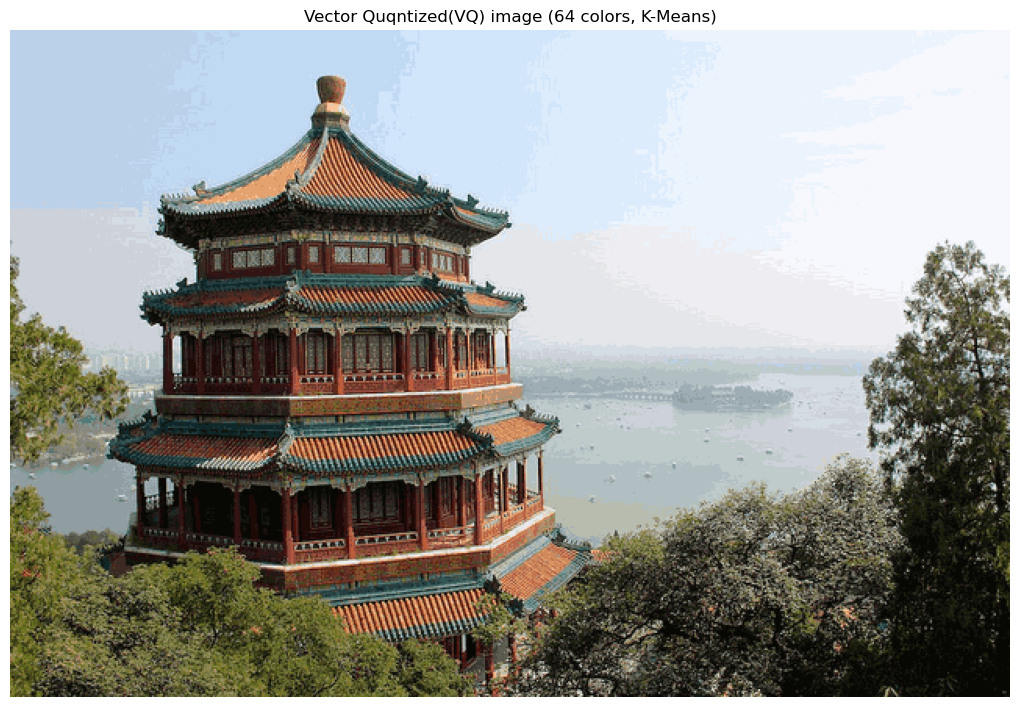

In [20]:
plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original 이미지 (96,615 colors)')
plt.imshow(china)
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Vector Quqntized(VQ) image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [21]:
# 문제 :
- 웹에서 이미지를 다운받으시오
- 이미지 사이즈를 확인하시오
- 컬러를 16컬러로 벡터 양자화 하시오
- 양자화된 값으로 아미지를 표현해 보시오
- 원래 이미지와 양자화된 이미지의 사이즈를 비교해 보시오

SyntaxError: invalid syntax (<ipython-input-21-d6dfd05b7cbe>, line 2)

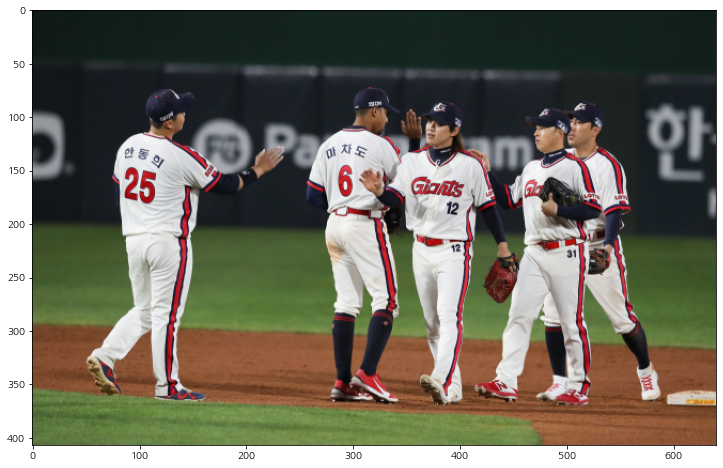

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
import numpy as np
lotte = plt.imread("롯데.jpg")
plt.figure(figsize= (15,8))
plt.imshow(lotte)

In [2]:
n_colors = 16
lotte = np.array(lotte, dtype=np.float64) / 255 # 이미지 정규화
w, h, d = original_shape = tuple(lotte.shape)
print(w, h, d)

407 640 3


In [3]:
assert d == 3 # 컬러이미지를 로딩했는지 확인
image_array = np.reshape(lotte, (w* h, d)) # 2차원으로 직렬화
print("Kmeans 데이터 피팅")

Kmeans 데이터 피팅


In [4]:
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

print("(k-means) 예측")
labels = kmeans.predict(image_array) # 427 * 640

def recreate_image(codebook, lables, w, h): # 중심값팔레트, 중심값인덱스, 이미지크기
    d = codebook.shape[1] # 2차원 
    image = np.zeros((w,h,d)) # 이미지 사이즈 만큼 초기화
    label_idx = 0
    for i in range(w):
        for j in range(h): 
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

(k-means) 예측


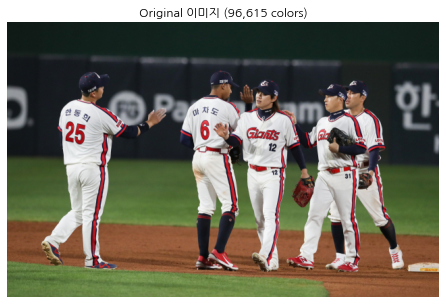

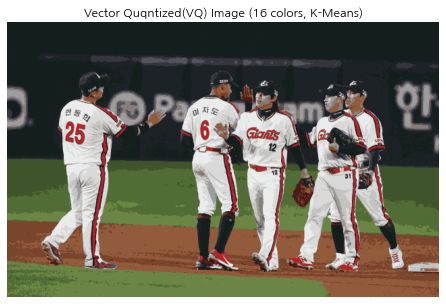

In [5]:
plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original 이미지 (96,615 colors)')
plt.imshow(lotte)
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Vector Quqntized(VQ) Image (16 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [40]:
recreate_image(kmeans.cluster_centers_, labels, w, h).size

781440

In [41]:
lotte.size

781440

In [42]:
recreate_image(kmeans.cluster_centers_, labels, w, h).shape

(407, 640, 3)

In [43]:
lotte.shape

(407, 640, 3)

In [44]:
image_array.shape

(260480, 3)

In [45]:
((kmeans.cluster_centers_.shape[0] * kmeans.cluster_centers_.shape[1]) + len(kmeans.labels_))/1024

1.0234375

In [46]:
lotte.shape[0]* lotte.shape[1] * lotte.shape[2] / 1024

763.125

In [47]:
lotte.reshape(w*h,d)

array([[0.05882353, 0.10196078, 0.08627451],
       [0.05882353, 0.10196078, 0.08627451],
       [0.0627451 , 0.10588235, 0.09019608],
       ...,
       [0.54509804, 0.32941176, 0.20784314],
       [0.54509804, 0.32941176, 0.21176471],
       [0.54901961, 0.33333333, 0.21176471]])

In [48]:
print(lotte.shape)
# kilo byte

print((lotte.shape[0] * lotte.shape[1] * lotte.shape[2]) / 1024, "kb")

(407, 640, 3)
763.125 kb


In [49]:
x, y, z = lotte.shape

lotte_array = np.array(lotte, dtype=np.float64) / 255

image_2d = lotte_array.reshape(x*y, z)
print(image_2d.shape)

(260480, 3)


C:\Users\020\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


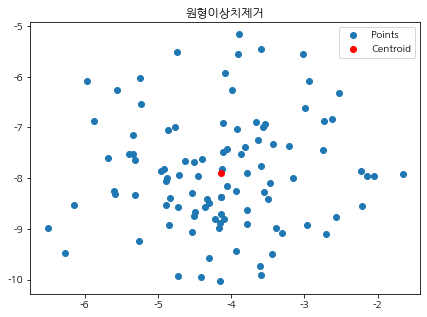

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
X, label = make_blobs(100, centers = 1)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('원형이상치제거')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
          kmeans.cluster_centers_[:, 1], label='Centroid', color='r')
ax.legend(loc='best')

In [15]:
distances = kmeans.transform(X) # 데이터를 center point와의 거리값 변경
sorted_idx = np.argsort(distances.ravel())[::-1][:5]

C:\Users\020\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=1)

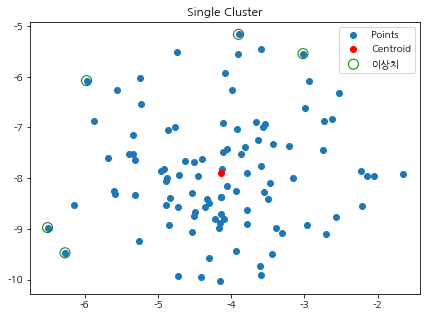

In [17]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:,0],
          kmeans.cluster_centers_[:,1],
          label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0],
          X[sorted_idx][:, 1],
          label = '이상치', edgecolors='g',
          facecolors='none', s=100)
ax.legend(loc='best')
new_X = np.delete(X, sorted_idx, axis=0)
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)

In [ ]:
#문제 : 이상치가 중심점 좌표에 영향을 미치는 것을 확인하고
# 이상치 제거전과 후의 중심점을 그래프로 출력해보시오

C:\Users\020\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[-4.13727526 -7.89921052]]


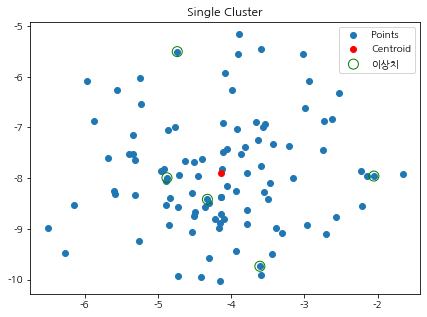

In [40]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:,0],
          kmeans.cluster_centers_[:,1],
          label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0],
          X[sorted_idx][:, 1],
          label = '이상치', edgecolors='g',
          facecolors='none', s=100)
ax.legend(loc='best')
new_X = np.delete(X, sorted_idx, axis=0)
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)
print(kmeans.cluster_centers_)

In [41]:
distances = kmeans.transform(new_X) # 데이터를 center point와의 거리값 변경
sorted_idx = np.argsort(distances.ravel())[::-1][:5]

[[-4.14880903 -7.89801264]]
[[-4.13727526 -7.89921052]]


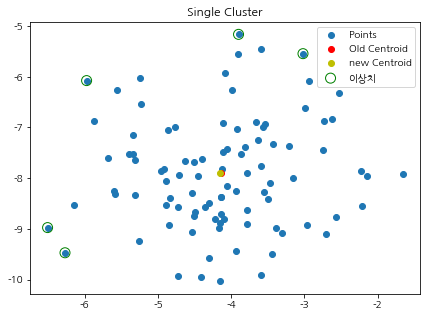

In [46]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(new_X[:, 0], new_X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:,0],
          kmeans.cluster_centers_[:,1],
          label='Old Centroid', color='r')
ax.scatter(new_kmeans.cluster_centers_[:,0],
          new_kmeans.cluster_centers_[:,1],
          label='new Centroid', color='y')
ax.scatter(new_X[sorted_idx][:, 0],
          new_X[sorted_idx][:, 1],
          label = '이상치', edgecolors='g',
          facecolors='none', s=100)
ax.legend(loc='best')
print(new_kmeans.cluster_centers_)
print(kmeans.cluster_centers_)

Text(0, 0.5, '특성 1')

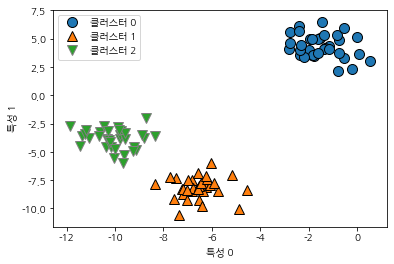

In [48]:
import mglearn # 모델 시각화를 위해서 만듬
from sklearn.cluster import AgglomerativeClustering # 계층적 : 병합
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X) # 그룹번호를 할당
# 모델 출력을 위해서
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

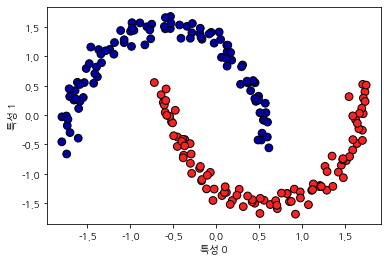

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
# clustering 에서도 정규화 하면 좋다
X_scaled = scaler.transform(X)

dbscan = DBSCAN() # scikits : eps, min_samples
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
           cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


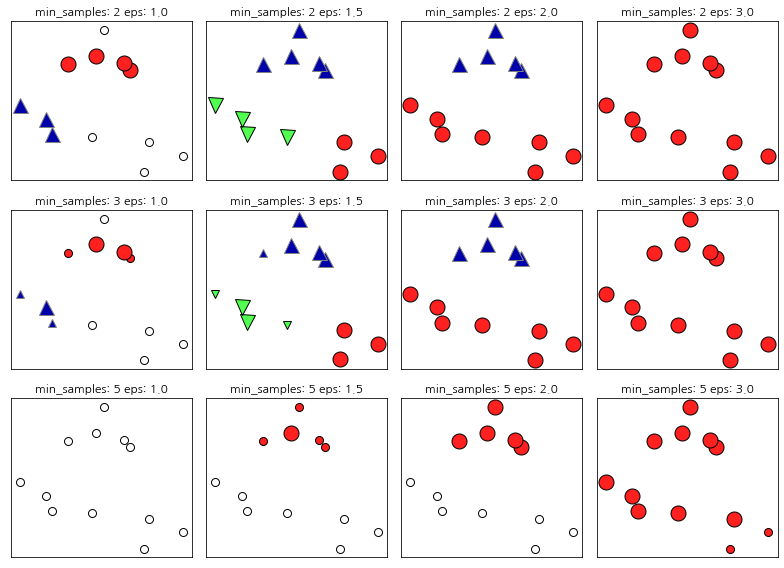

In [50]:
mglearn.plots.plot_dbscan()

# 문제
### 다음 데이터에 대하여 eps와 min_samples를 조절하여 3개의 그룹으로
- clustering하도록 조절해 보시오
- 그리고 결과를 시각화해 보시오

In [3]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
centers = [[1,1],[-1,-1],[1,-1]]
X, labels_true = make_blobs(n_samples=750, centers=centers,
                            cluster_std=0.4, random_state=0)

Text(0, 0.5, '특성 1')

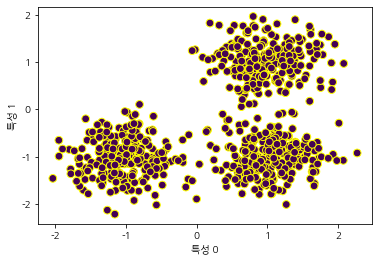

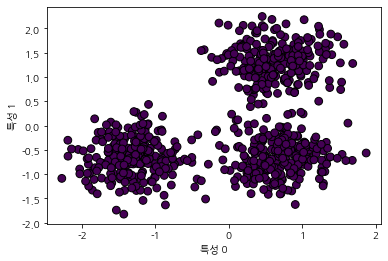

In [12]:
import mglearn # 모델 시각화를 위해서 만듬
from sklearn.cluster import AgglomerativeClustering # 계층적 : 병합
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
scaler = StandardScaler()
scaler.fit(X)
# clustering 에서도 정규화 하면 좋다
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps=2, min_samples=5) # scikits : eps, min_samples

clusters1 = dbscan.fit_predict(X)
clusters2 = dbscan.fit_predict(X_scaled)

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=clusters1,
            s=60, edgecolors='yellow')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

plt.figure(2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters2,
            s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


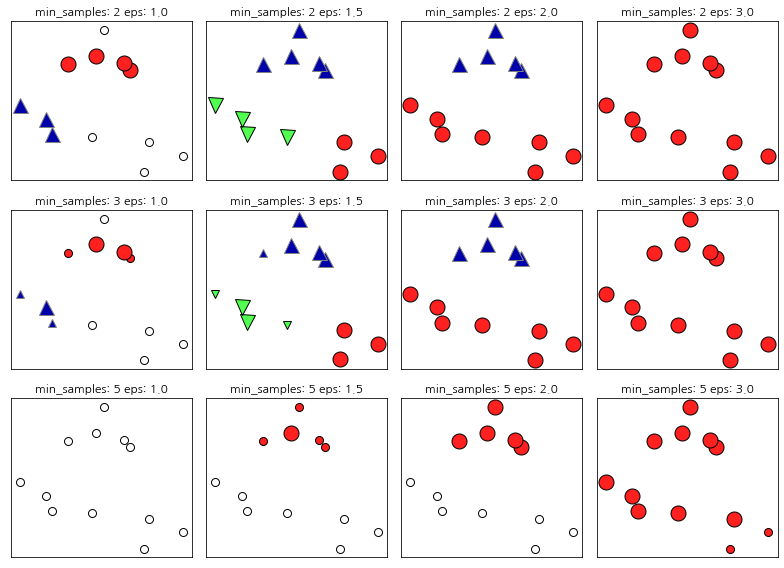

In [11]:
mglearn.plots.plot_dbscan()

# 팀별 과제
- tsclust를 학습하고 time series를 clustering하는 예제를 구현해 보시오
- tslearn = kmeans + DTW(dynamic time wrapping) + timeseries를 결합한 패키지

In [1]:
from tslearn.clustering import TimeSeriesKMeans

In [25]:
from sklearn import datasets
iris = datasets.load_iris()

In [32]:
import pandas as pd
pd.DataFrame(iris.data,columns=)

ValueError: Shape of passed values is (150, 4), indices imply (150, 3)

In [34]:
col=iris.target_names

In [35]:
col.append('target')

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
https://lafe.tistory.com/54